1. Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.
2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?
3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [5]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [8]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1.Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

This is indeed difficult - can GridSearch be applied to clustering models? Or is there an alternative?

eps=1, min_samples=1


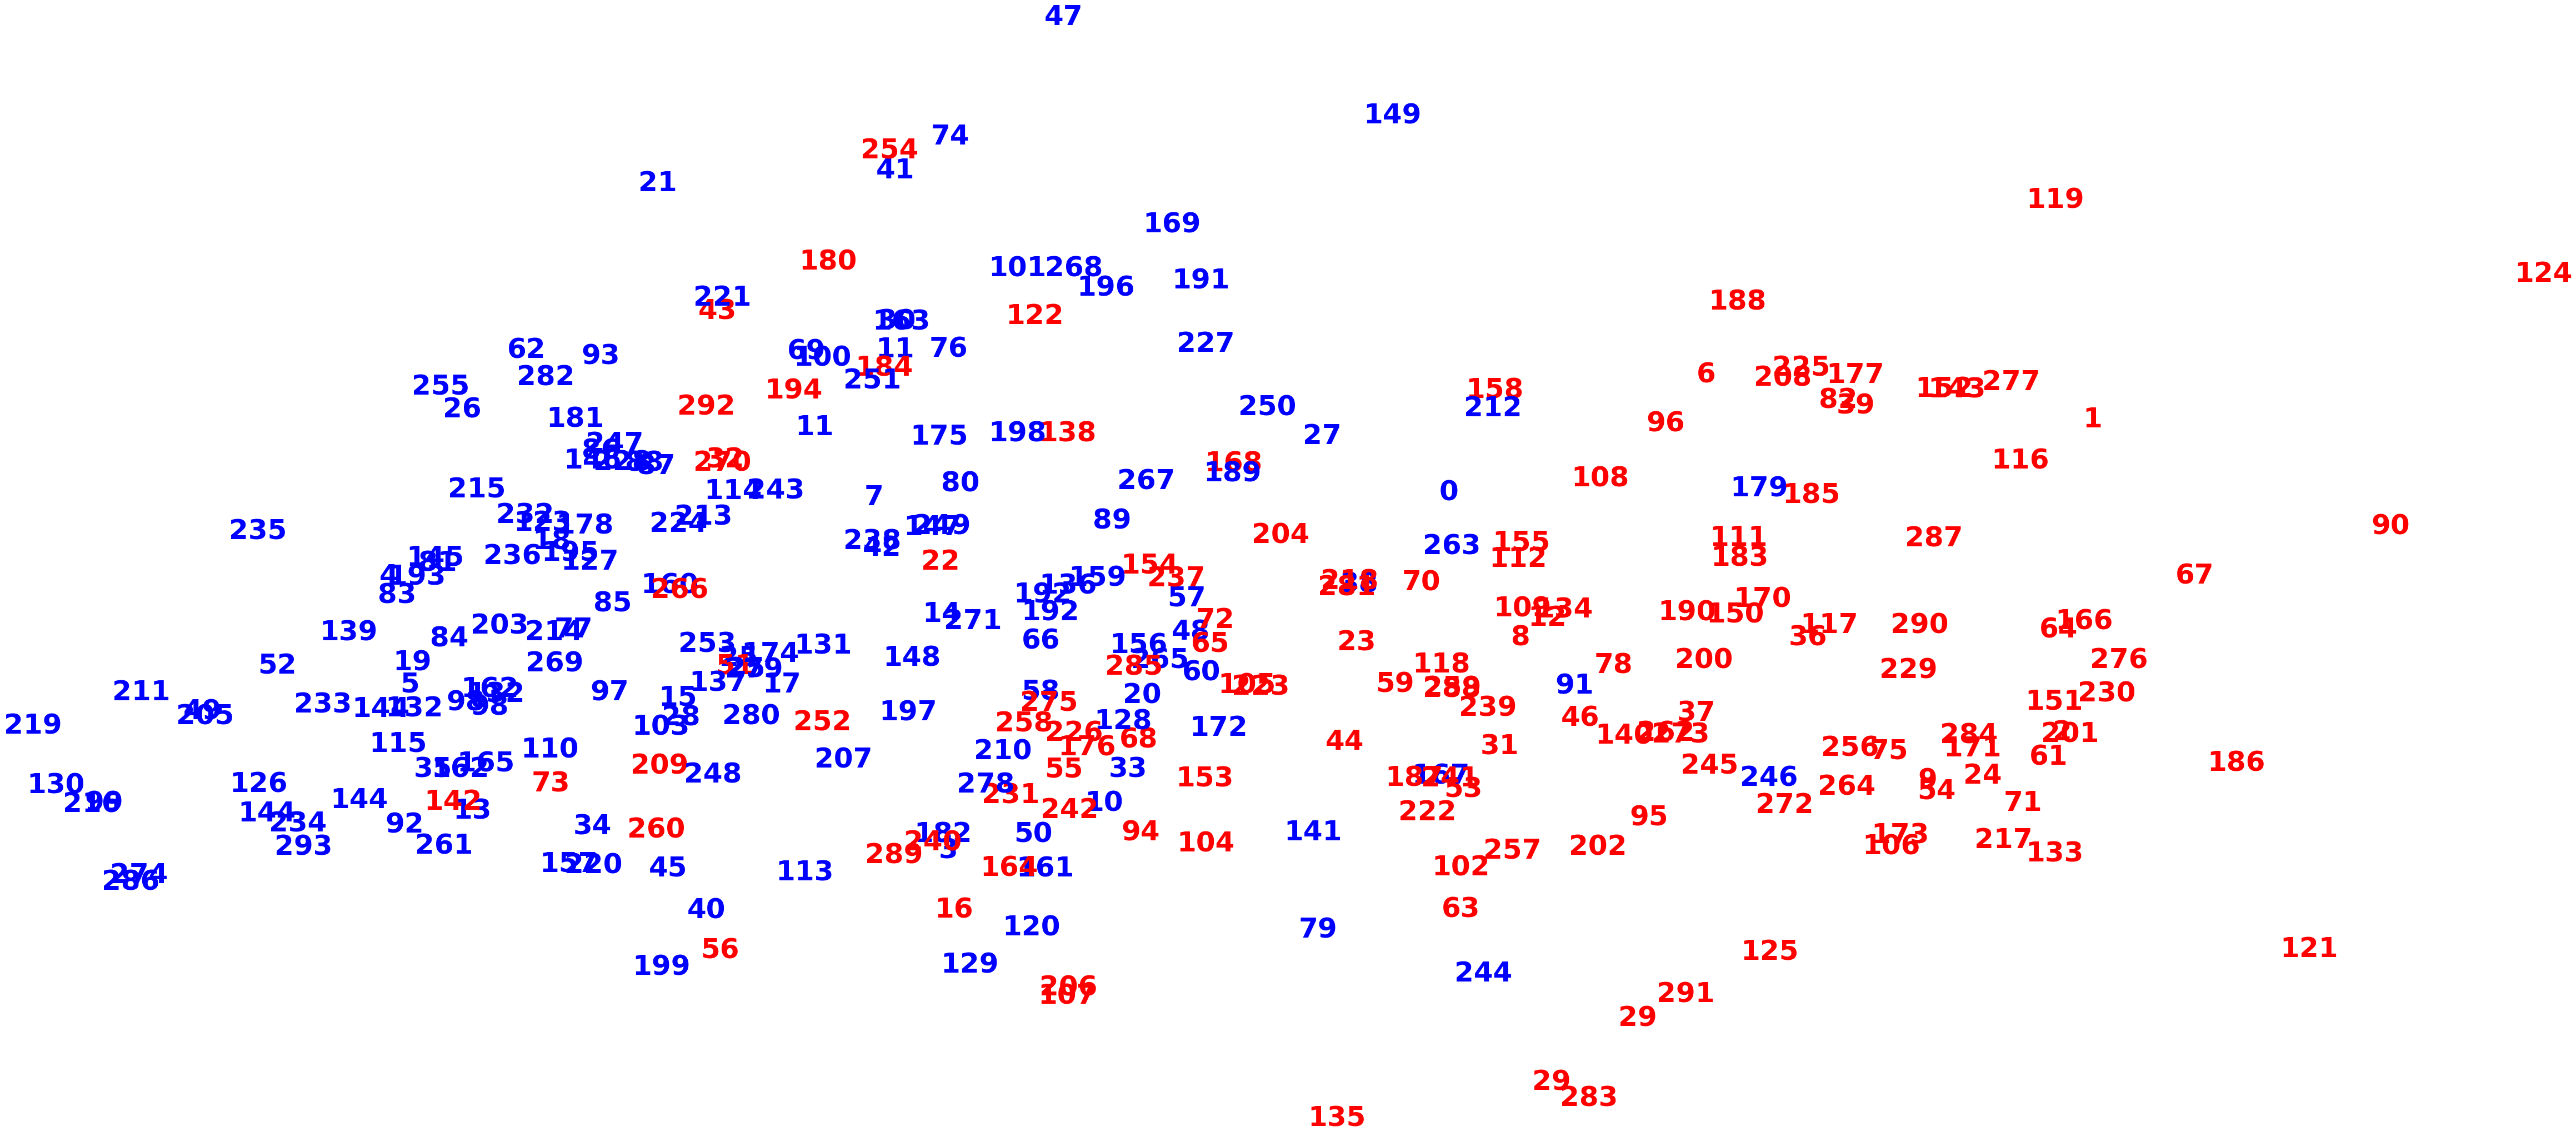

In [14]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=1, min_samples=1')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

eps=3, min_samples=3


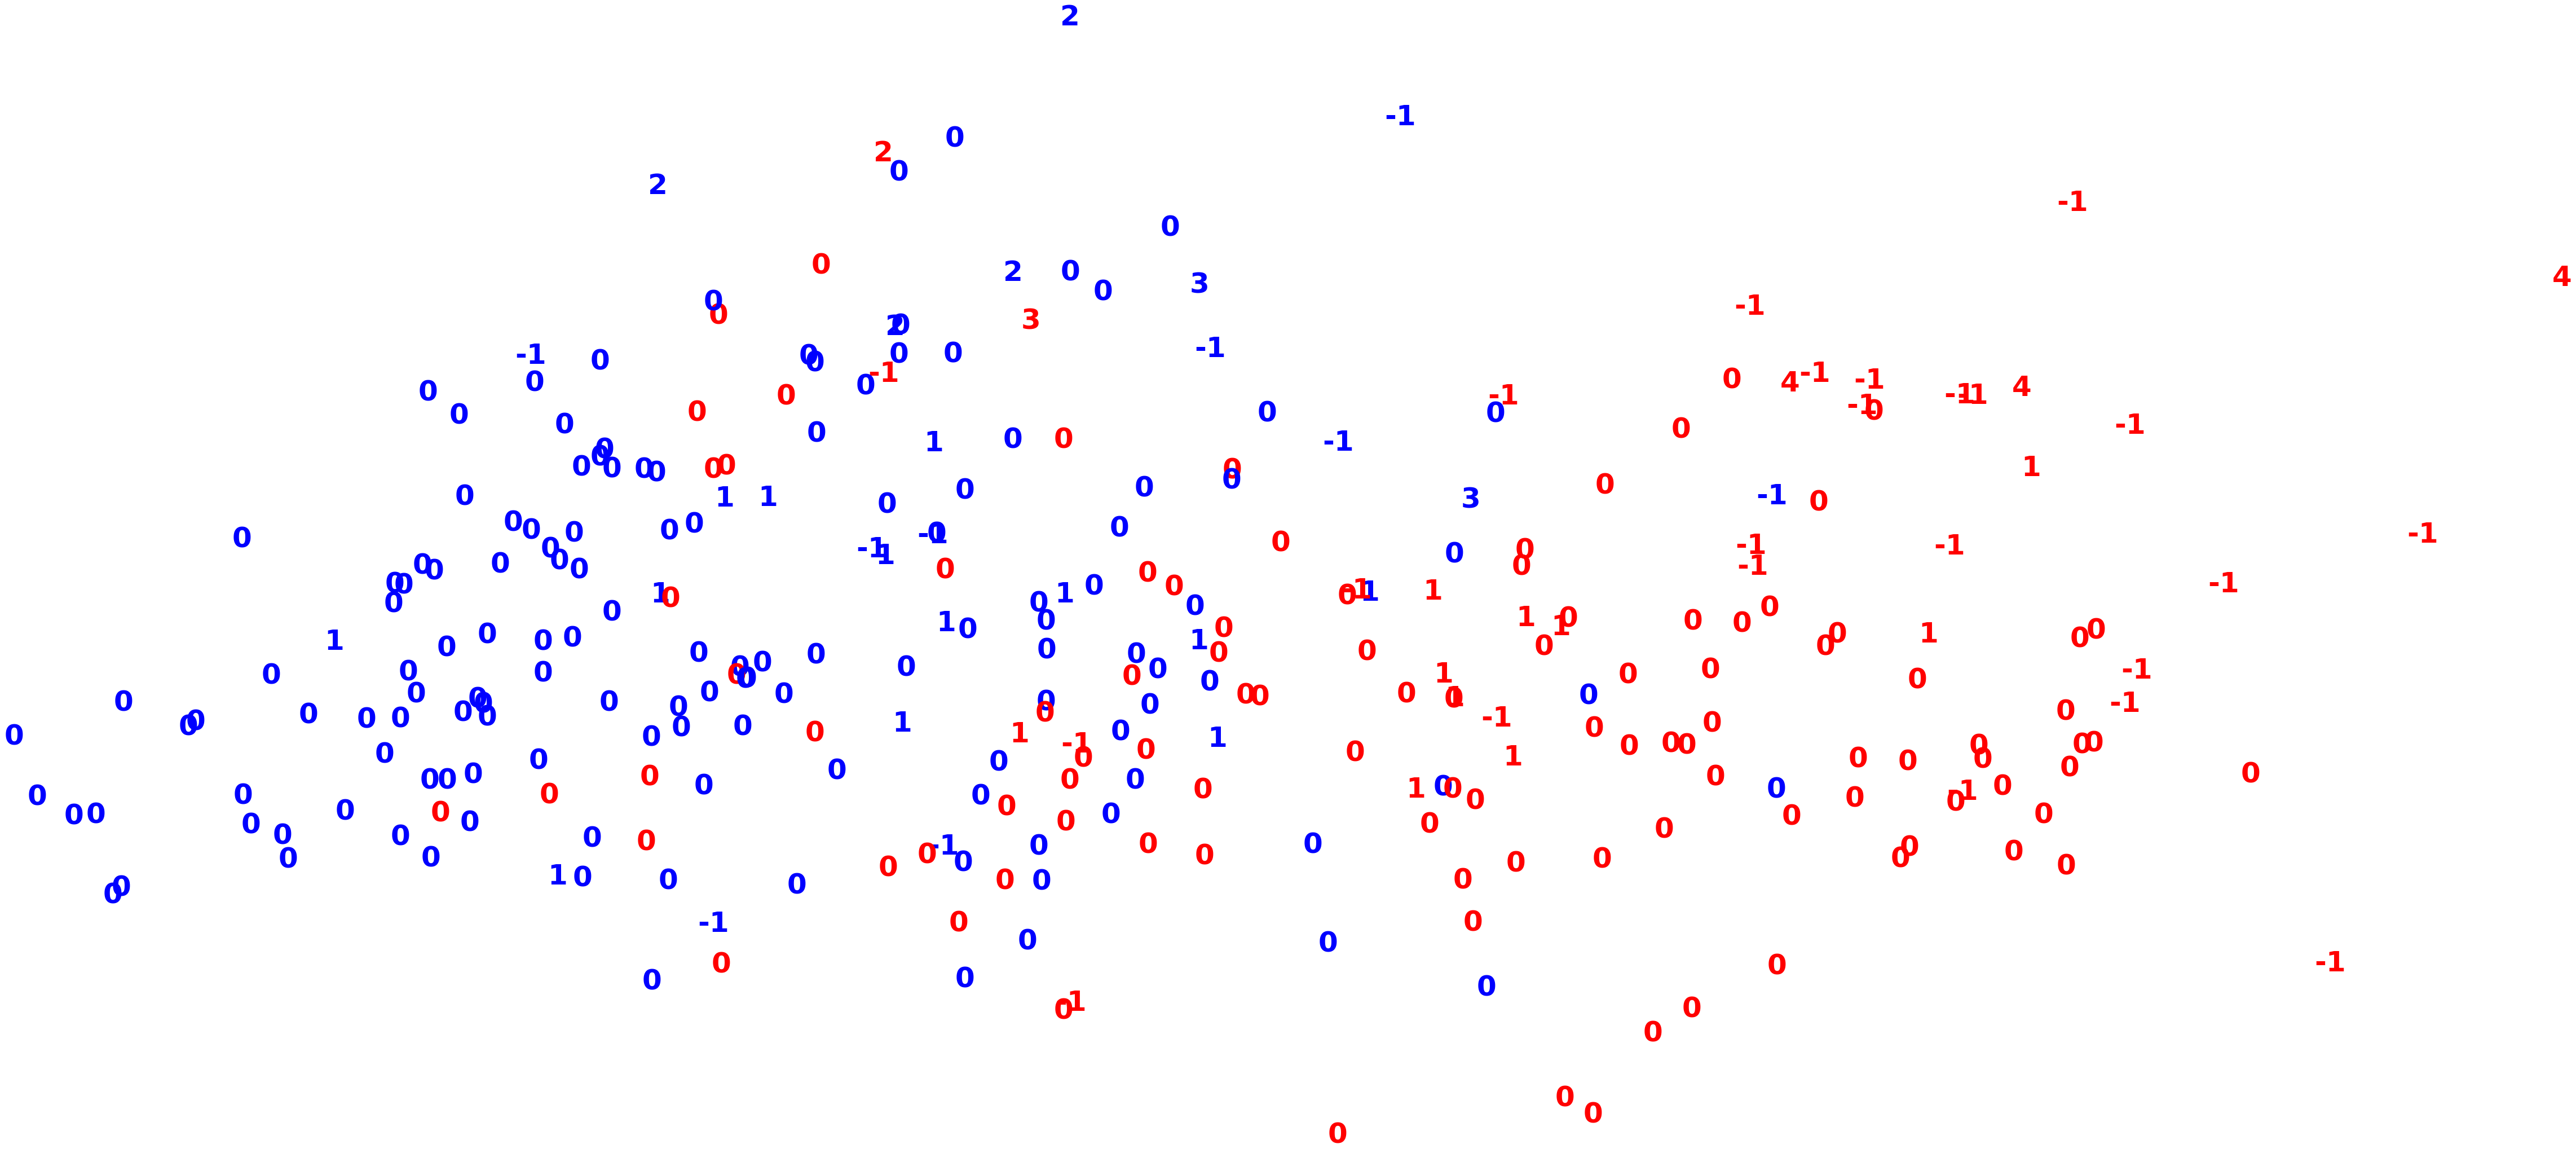

In [19]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=3, min_samples=3)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=3, min_samples=3')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

eps=2.5, min_samples=1


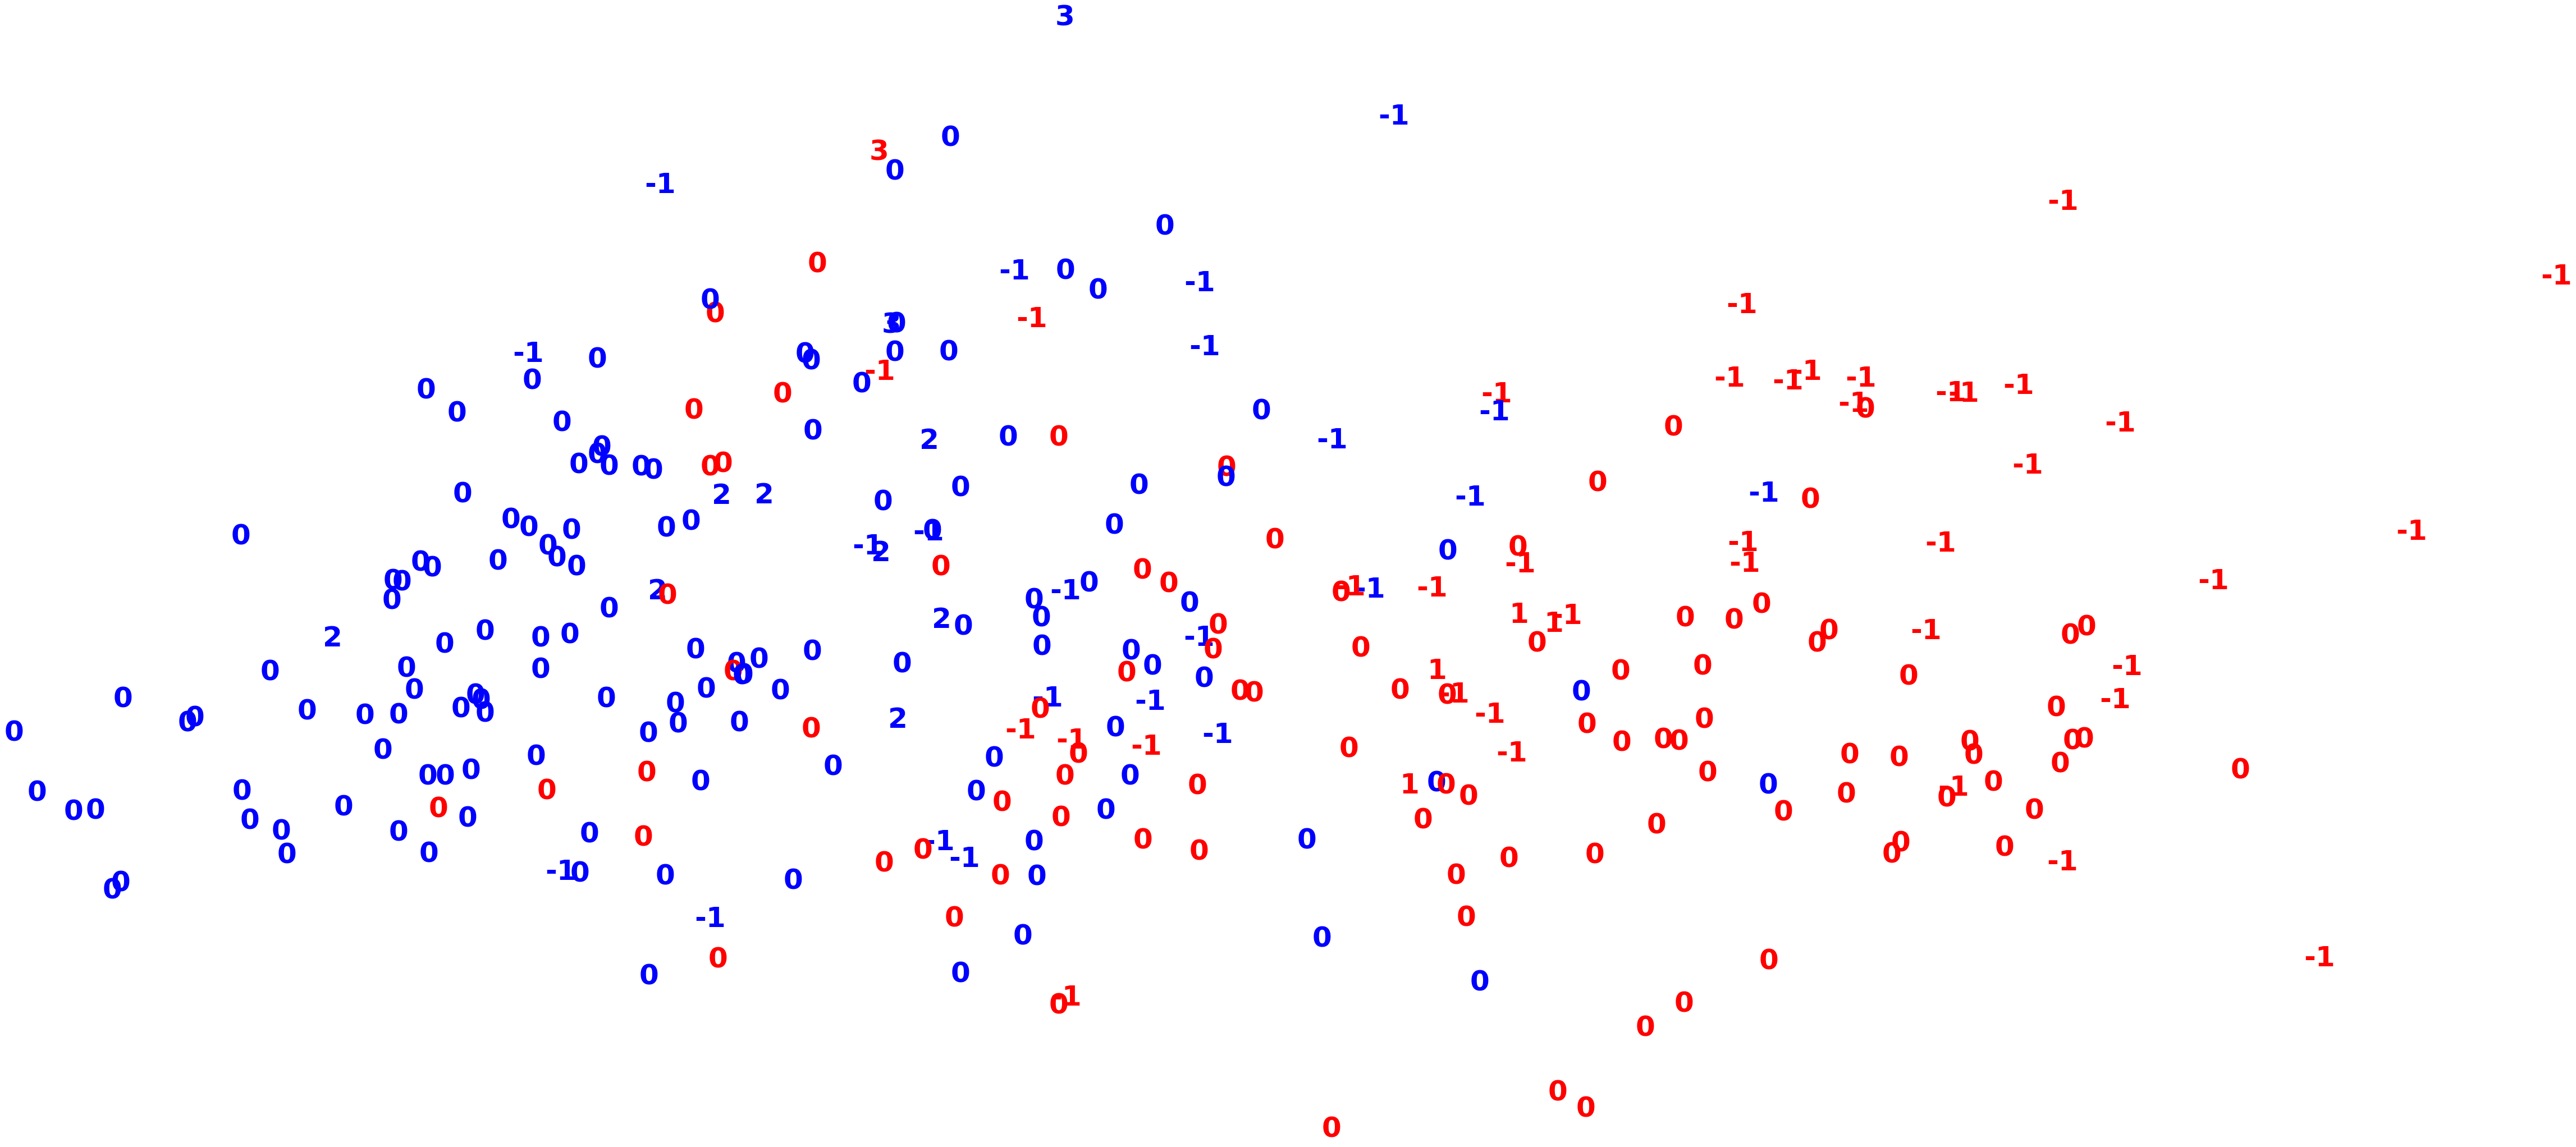

In [27]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2.75, min_samples=3)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=2.75, min_samples=3')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

2.Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

min_samples = 1: each individual point is its own cluster.
min_samples = 2: nearly everything is noise - the epsilon (distance) is too small.

eps=1, min_samples=1, metric=euclidean


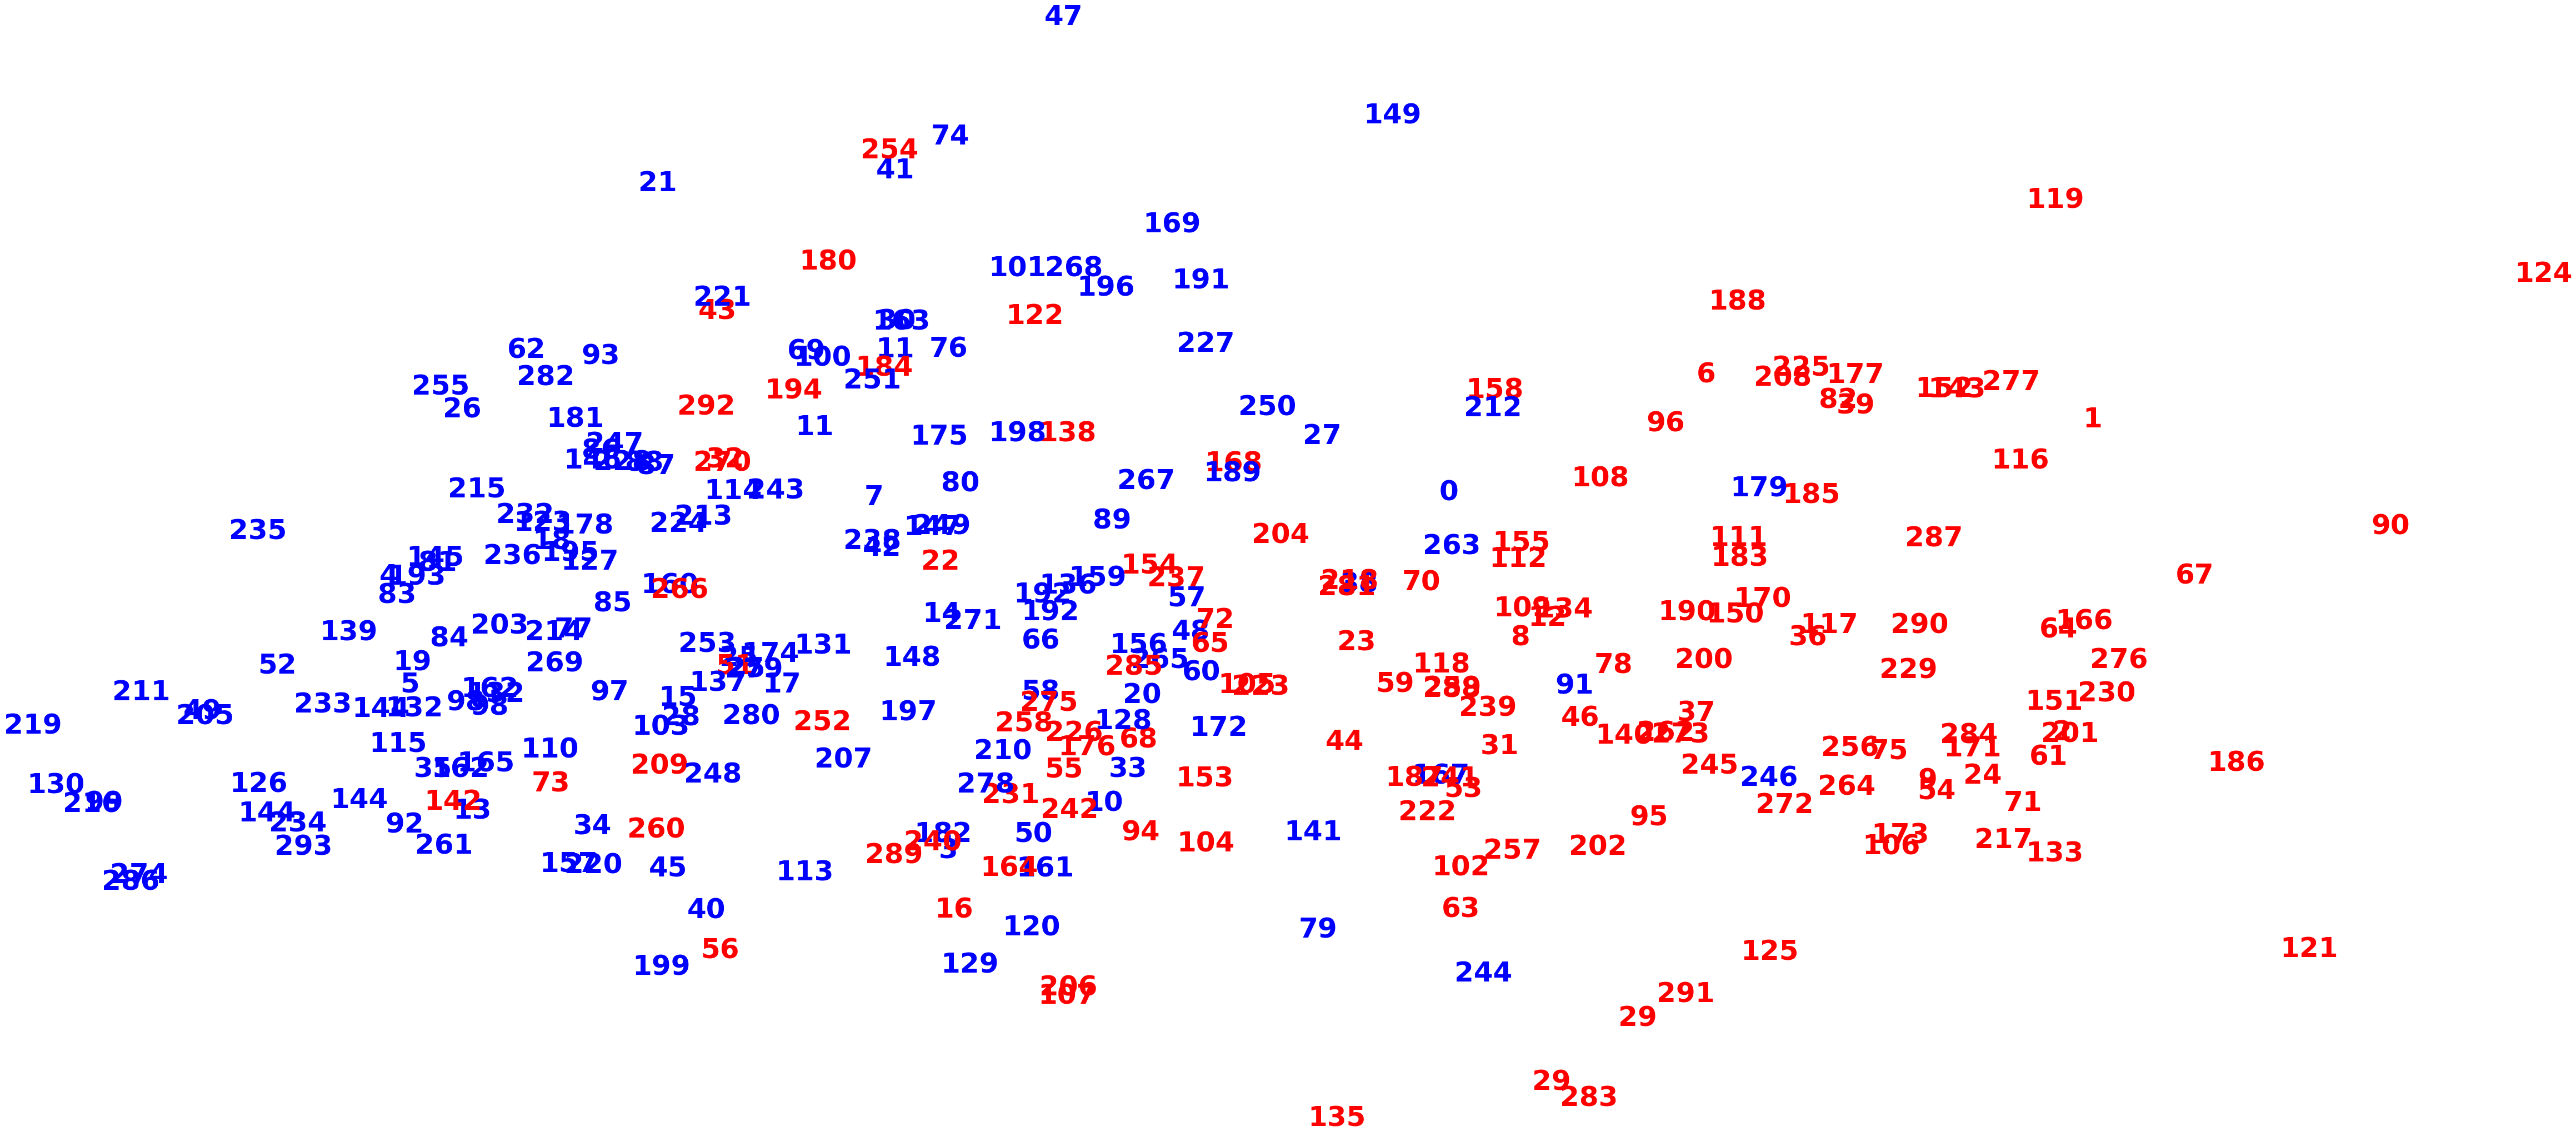

In [28]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric='euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=1, min_samples=1, metric=euclidean')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

eps=1, min_samples=2, metric=euclidean


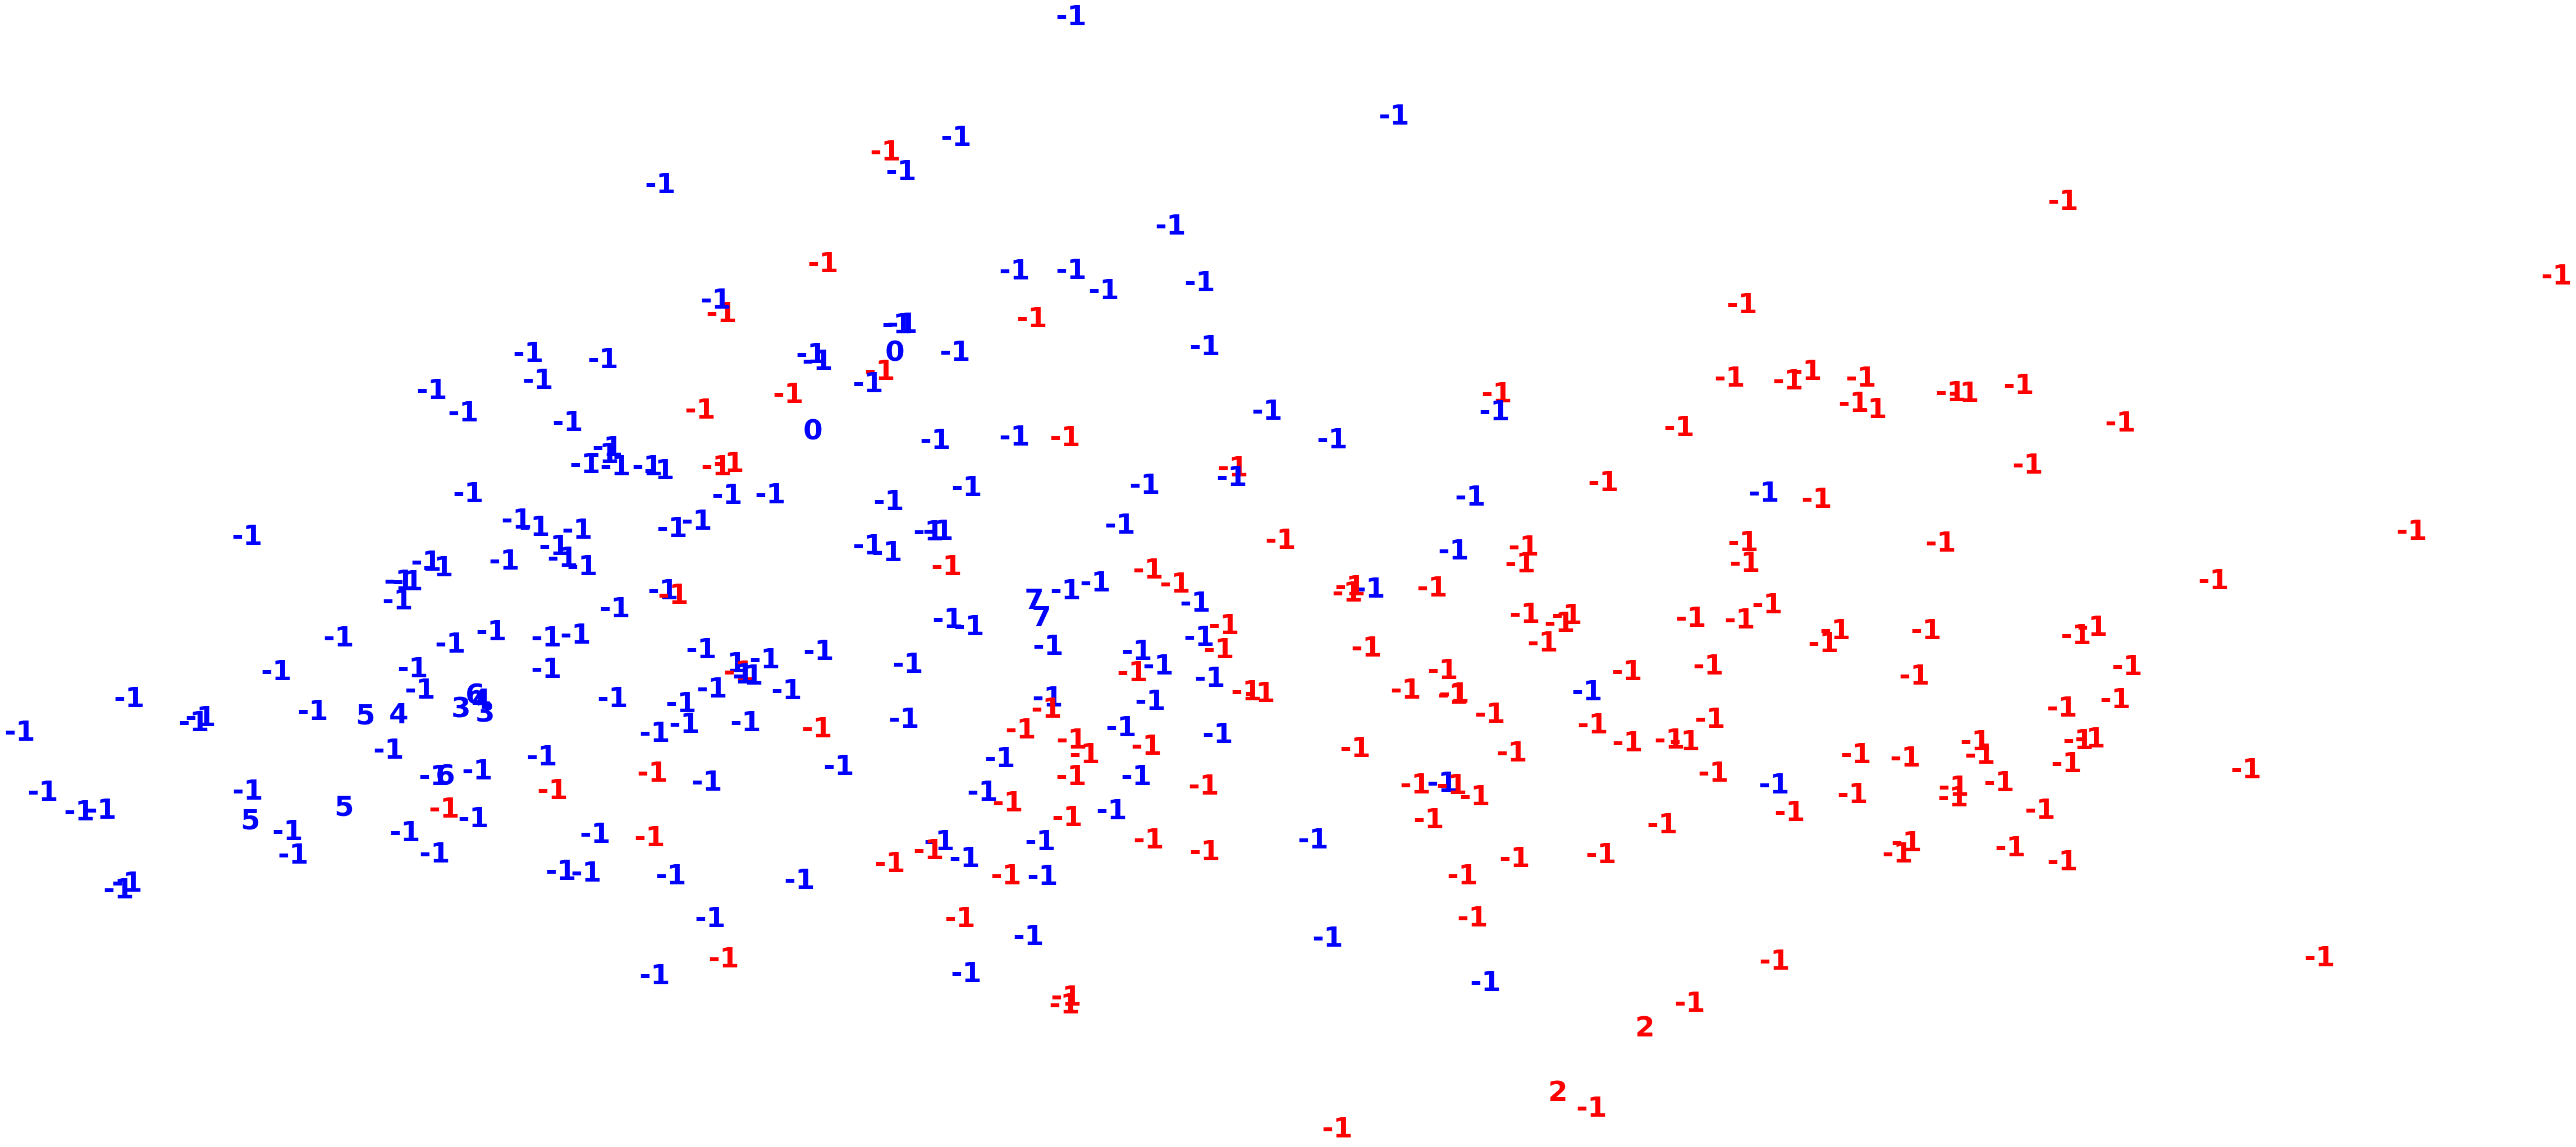

In [29]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=2, metric='euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=1, min_samples=2, metric=euclidean')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

3.Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

It does much better than simply increasing the distance - having min_samples = 3 does alright. However, min_samples = 4 is too tight a constraint and everything becomes noise.


eps=2, min_samples=1, metric=euclidean


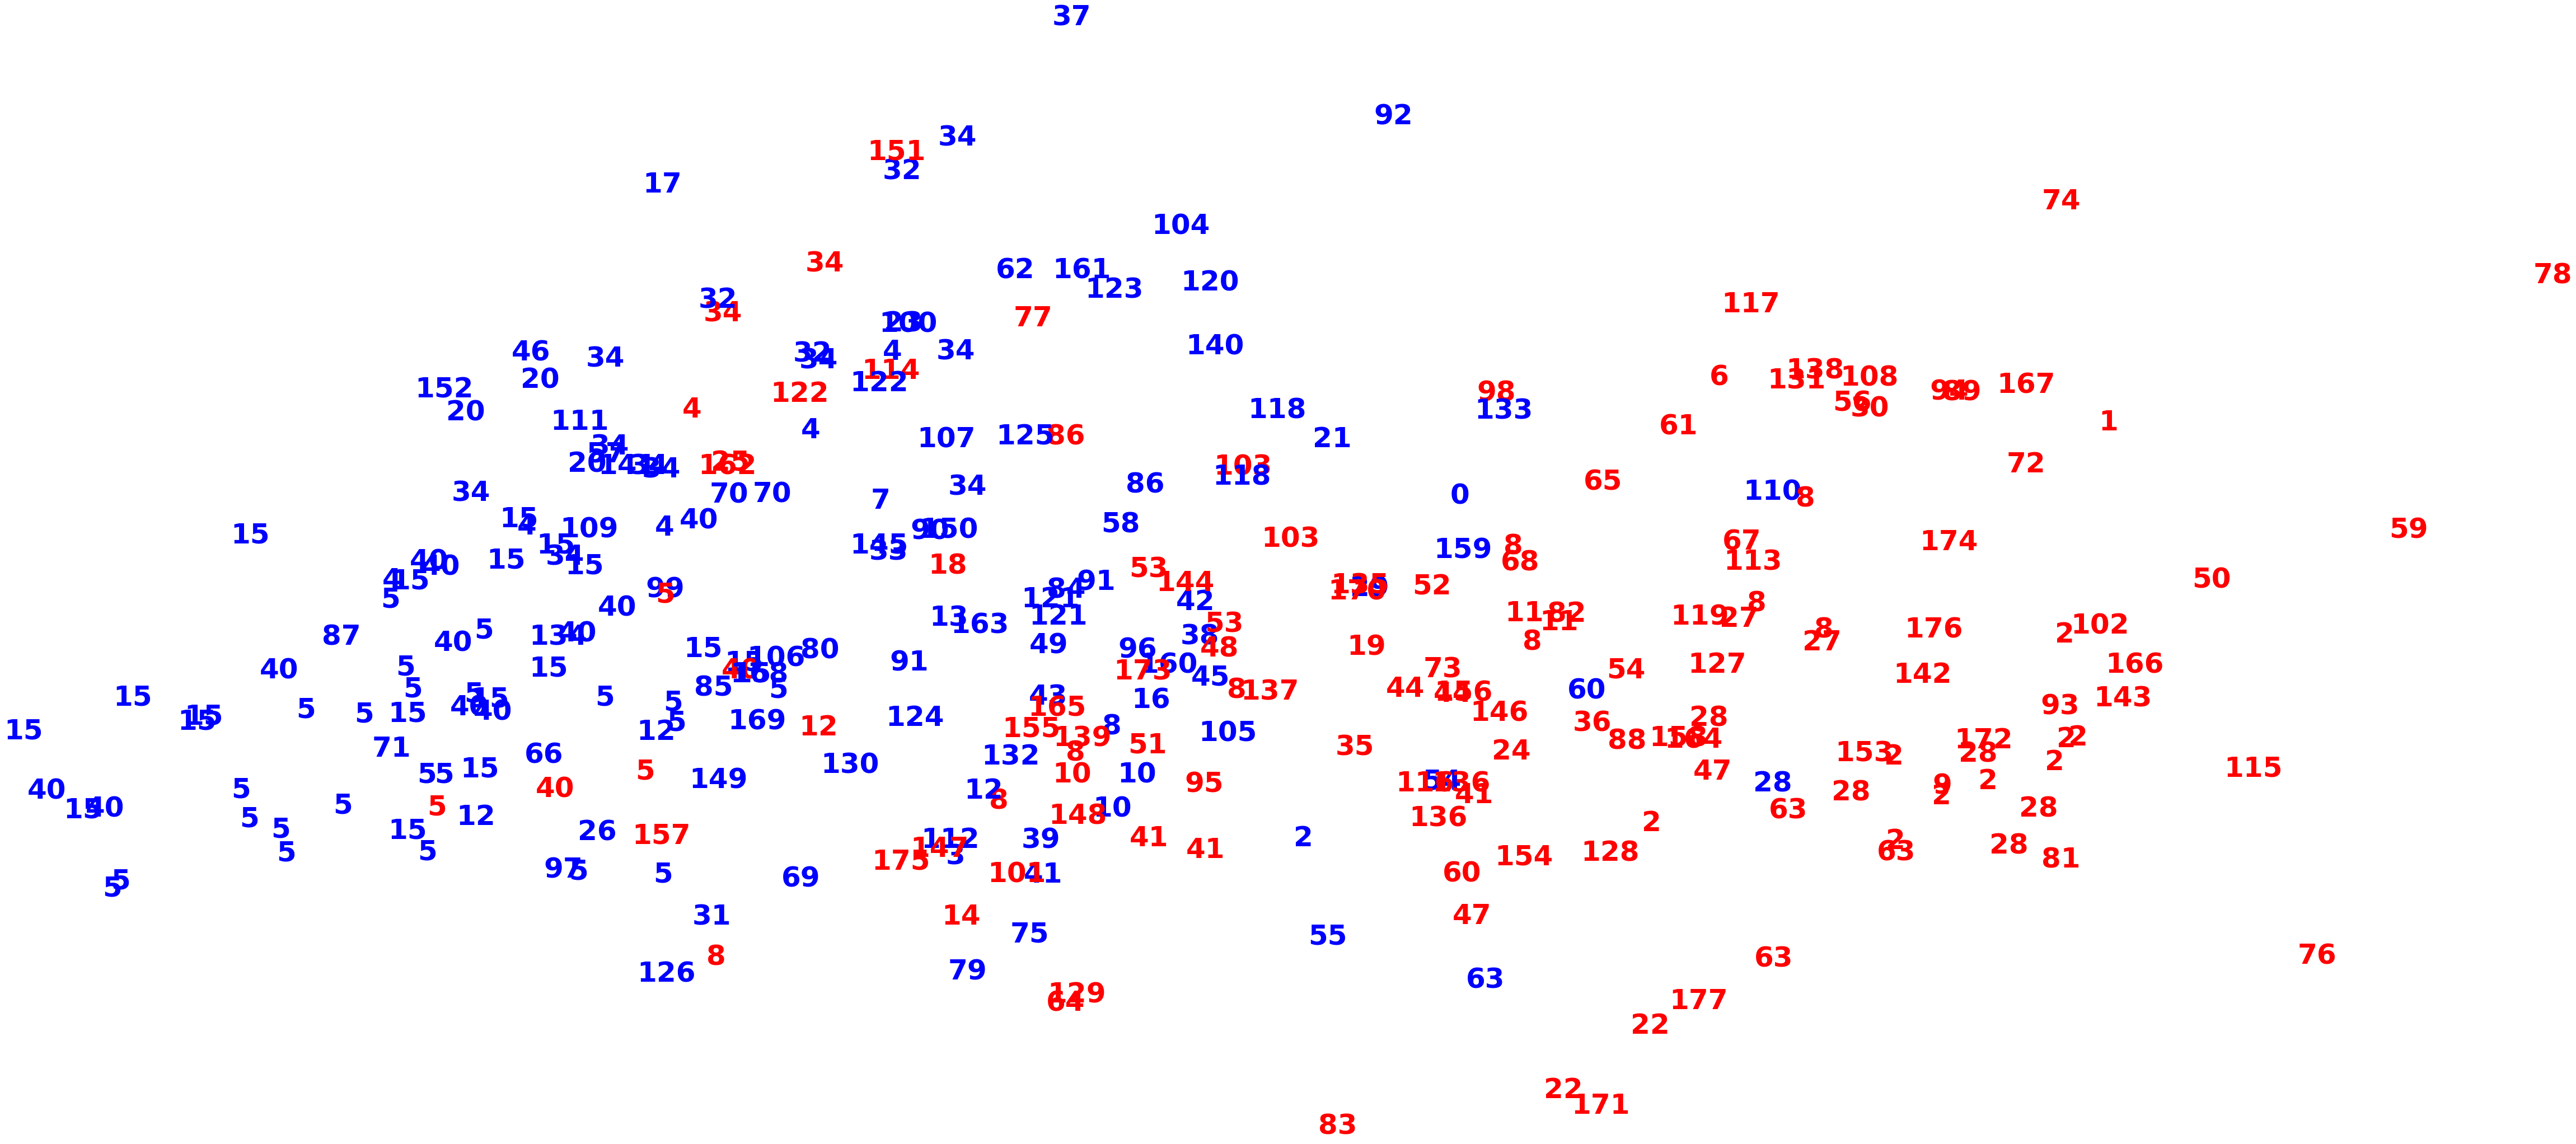

In [30]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=1, metric='euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=2, min_samples=1, metric=euclidean')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

eps=3, min_samples=1, metric=euclidean


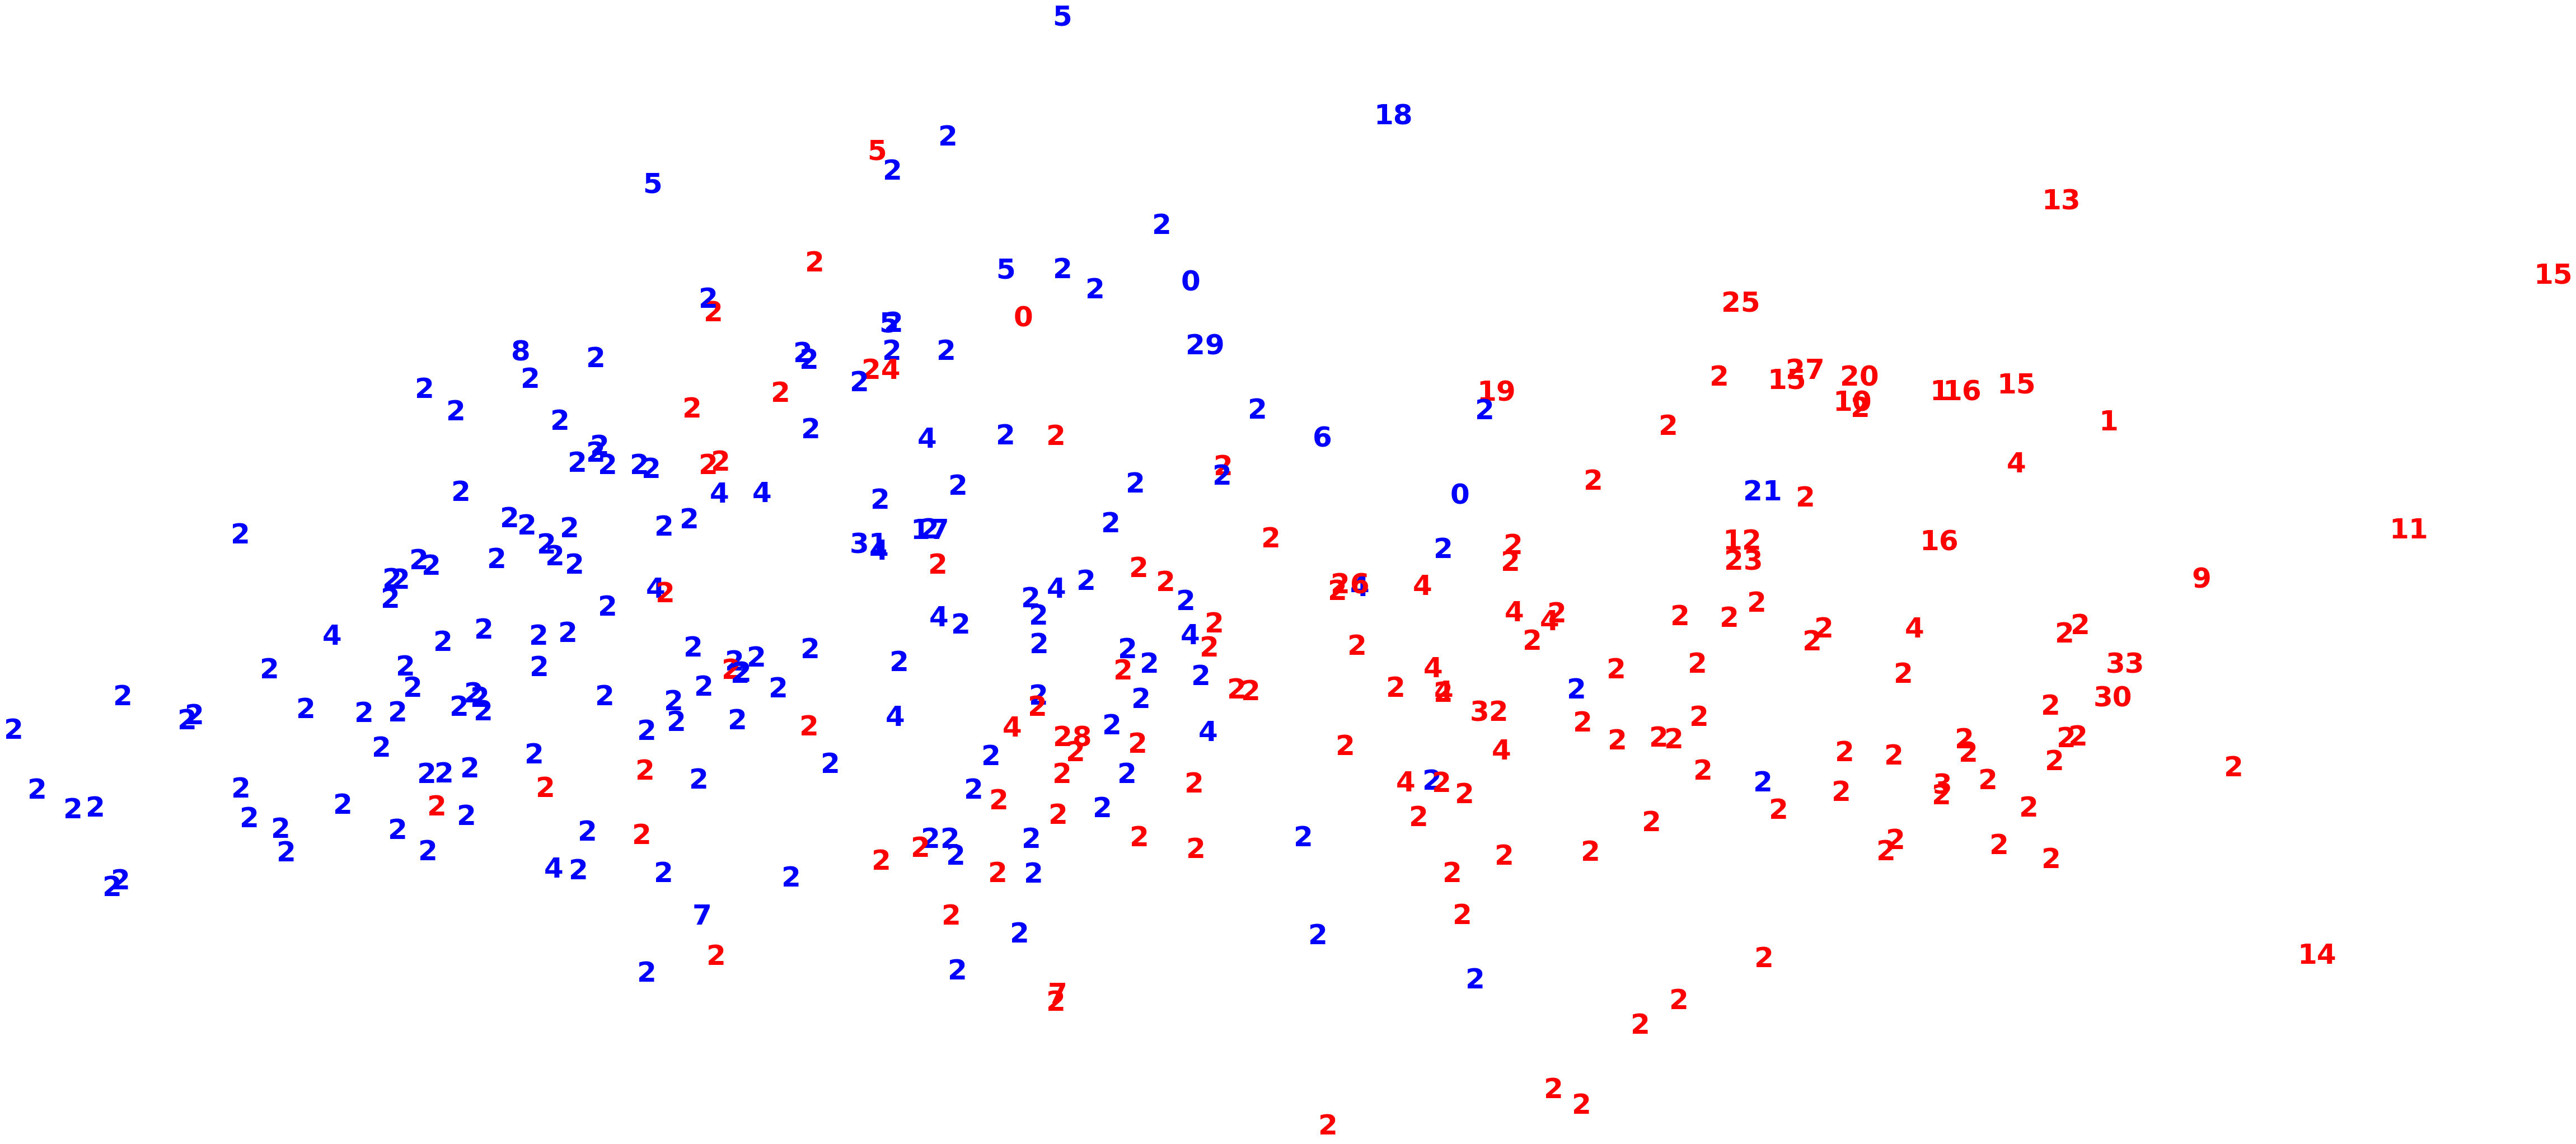

In [31]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric='euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=3, min_samples=1, metric=euclidean')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

eps=1, min_samples=4, metric=euclidean


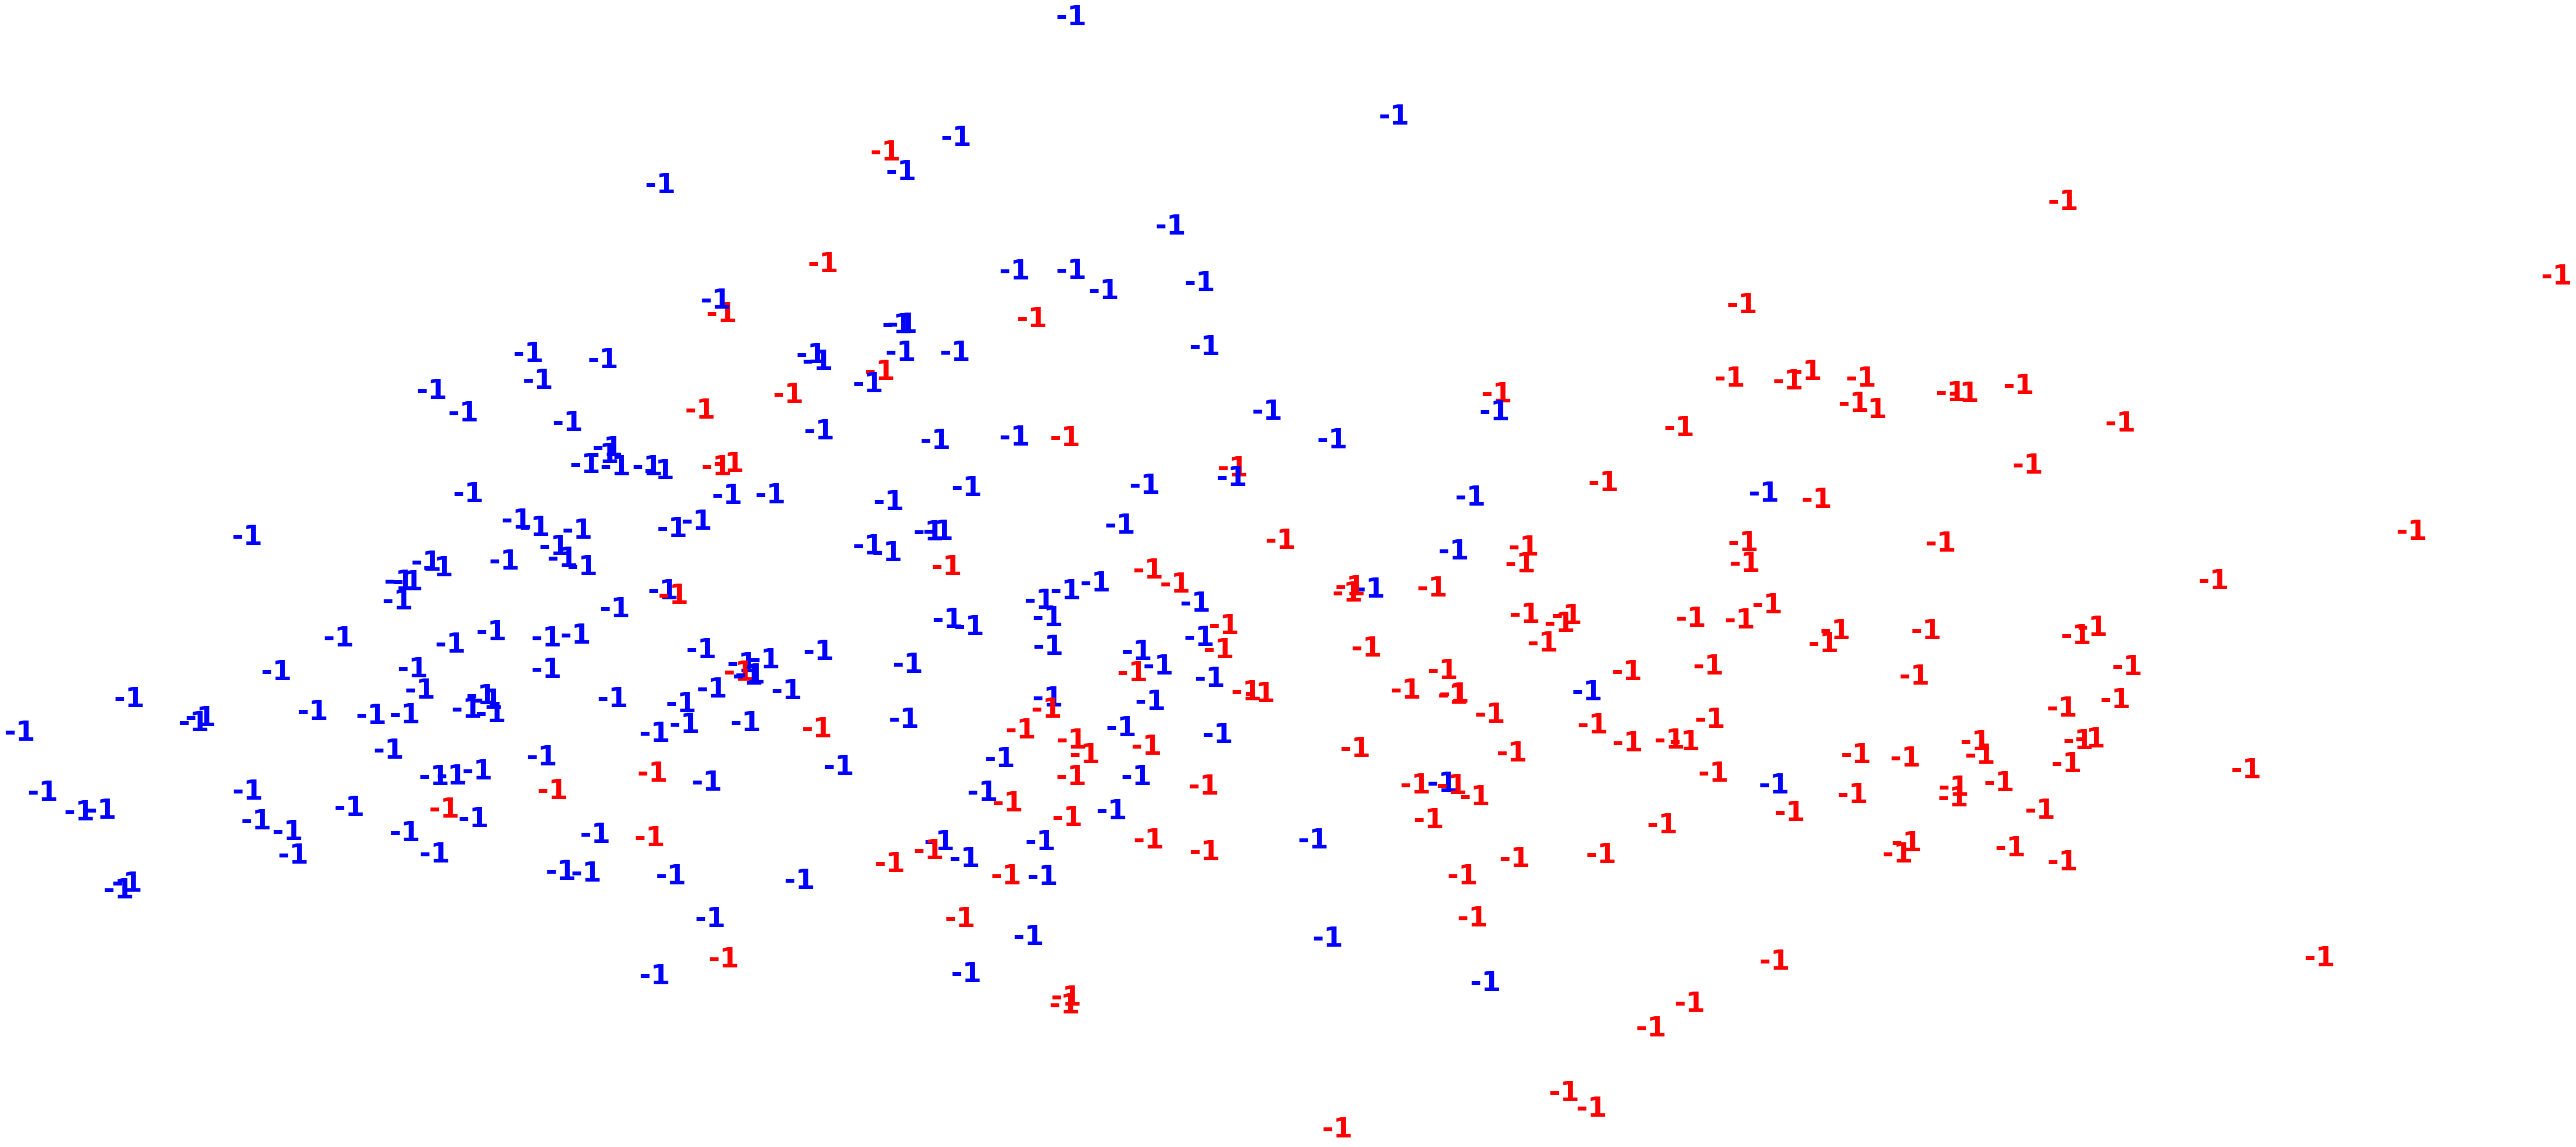

In [32]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=4, metric='euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

print('eps=1, min_samples=4, metric=euclidean')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()